# Classification Experiments

Performing machine learning classification experiments in order to automatically detect negation cues. In the previous week pre-processing the corpus has been applied and features extracted. Now can concentrate on selecting the classifier that will be used for performing the classification experiments.

In [1]:
# libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("datas/last_data.csv")
data = data.drop(["chapter","sentence_id","token_id"], axis=1)
dev_data = pd.read_csv("datas/dev_processed_data.csv", sep="\t")
dev_data = dev_data.drop(["chapter","sentence_id","token_id"], axis=1)
data.head()

,word,label,lemma,lowercase,pos_tag,matchesNegExp,startNegPrefix,endNegSuffix,suffix_cues_feature,prefix_cues_feature
0,1.,O,1.,1.,CD,0,0,0,0,0
1,Mr.,O,Mr.,mr.,NNP,0,0,0,0,0
2,Sherlock,O,Sherlock,sherlock,NN,0,0,0,0,0
3,Holmes,O,Holmes,holmes,NNS,0,0,0,0,0
4,Mr.,O,Mr.,mr.,NNP,0,0,0,0,0


In [3]:
dev_data.head()

,word,label,lemma,lowercase,pos_tag,matchesNegExp,startNegPrefix,endNegSuffix,suffix_cues_feature,prefix_cues_feature
0,The,O,The,the,DT,0,0,0,0,0
1,Singular,O,Singular,singular,JJ,0,0,0,0,0
2,Experience,O,Experience,experience,NN,0,0,0,0,0
3,of,O,of,of,IN,0,0,0,0,0
4,Mr.,O,Mr.,mr.,NNP,0,0,0,0,0


In [4]:
vec_X = DictVectorizer()
X_train = data.drop("label",axis=1)
X_train_dict = X_train.to_dict('records')
X_train = vec_X.fit_transform(X_train_dict).toarray()

X_test = dev_data.drop("label",axis=1)
X_test_dict = X_test.to_dict('records')
X_test = vec_X.transform(X_test_dict).toarray()

# Extract the 'label' column as the target variable
y_train = data['label']
y_test = dev_data["label"]

In [5]:
# Train an SVM model using the training data
#svm_model = svm.SVC()
svm_model = LinearSVC(max_iter=3000)
svm_model.fit(X_train, y_train)

LinearSVC(max_iter=3000)

In [6]:
y_pred = svm_model.predict(X_test)

In [7]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.9974200206398349


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       B-NEG       0.90      0.91      0.91       176
       I-NEG       0.00      0.00      0.00         3
           O       1.00      1.00      1.00     13387

    accuracy                           1.00     13566
   macro avg       0.63      0.64      0.64     13566
weighted avg       1.00      1.00      1.00     13566



In [9]:
print(confusion_matrix(y_test, y_pred))

[[  160     0    16]
 [    1     0     2]
 [   16     0 13371]]


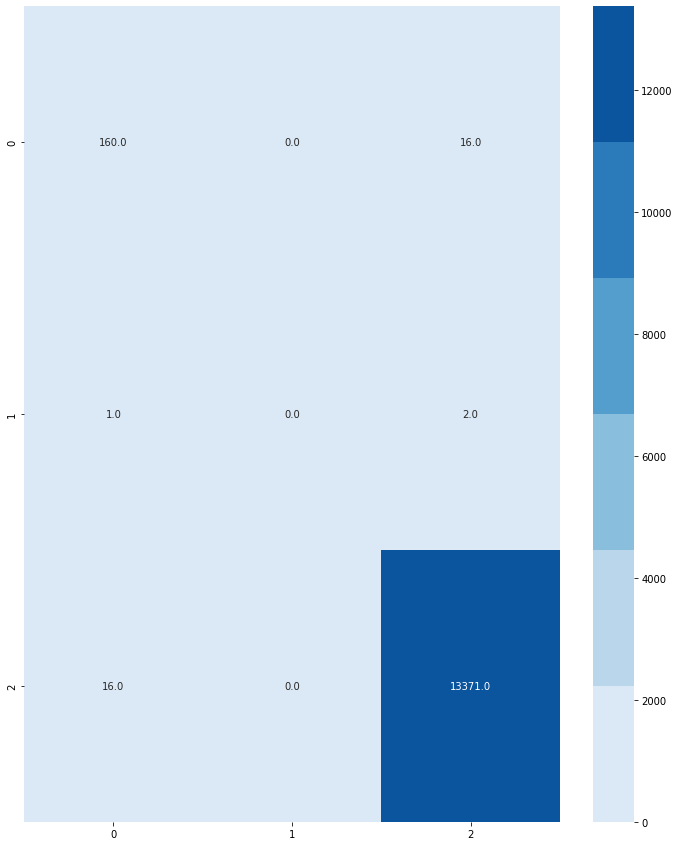

In [10]:
cf_matrix = confusion_matrix(y_test, y_pred)
colormap = sns.color_palette("Blues")
plt.figure(figsize=(12,15));
sns.heatmap(cf_matrix, annot=True,cmap=colormap,fmt=".1f");

# Parameter Optimization

In [46]:
parameters = {
    'C': [0.01, 0.1, 1], 
    'loss':['hinge','squared_hinge'],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1]
}

In [47]:
grid = GridSearchCV(estimator=svm_model, param_grid=parameters, cv=5, scoring='f1_macro', verbose=5)

In [48]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ....C=0.01, loss=hinge, tol=0.0001;, score=0.605 total time=  46.8s
[CV 2/5] END ....C=0.01, loss=hinge, tol=0.0001;, score=0.622 total time=  28.8s
[CV 3/5] END ....C=0.01, loss=hinge, tol=0.0001;, score=0.621 total time=  37.7s
[CV 4/5] END ....C=0.01, loss=hinge, tol=0.0001;, score=0.619 total time=  41.5s
[CV 5/5] END ....C=0.01, loss=hinge, tol=0.0001;, score=0.621 total time=  33.8s
[CV 1/5] END .....C=0.01, loss=hinge, tol=0.001;, score=0.605 total time=  27.5s
[CV 2/5] END .....C=0.01, loss=hinge, tol=0.001;, score=0.622 total time=  28.6s
[CV 3/5] END .....C=0.01, loss=hinge, tol=0.001;, score=0.621 total time=  26.8s
[CV 4/5] END .....C=0.01, loss=hinge, tol=0.001;, score=0.619 total time=  27.4s
[CV 5/5] END .....C=0.01, loss=hinge, tol=0.001;, score=0.621 total time=  34.0s
[CV 1/5] END ......C=0.01, loss=hinge, tol=0.01;, score=0.605 total time=  41.6s
[CV 2/5] END ......C=0.01, loss=hinge, tol=0.01

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=3000),
             param_grid={'C': [0.01, 0.1, 1],
                         'loss': ['hinge', 'squared_hinge'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             scoring='f1_macro', verbose=5)

In [49]:
finetune_model = grid.best_estimator_

In [50]:
print("Best parameters: ", grid.best_params_)

Best parameters:  {'C': 1, 'loss': 'hinge', 'tol': 0.0001}


In [51]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

       B-NEG       0.90      0.91      0.91       176
       I-NEG       0.00      0.00      0.00         3
           O       1.00      1.00      1.00     13387

    accuracy                           1.00     13566
   macro avg       0.63      0.64      0.64     13566
weighted avg       1.00      1.00      1.00     13566



In [11]:
svm_model = LinearSVC(C= 1, loss= 'hinge', tol= 0.0001)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [16]:
predicted_data = pd.DataFrame()
predicted_data["token"] = dev_data["word"]
predicted_data["gold"] = dev_data["label"]
predicted_data["predicted"] = y_pred
predicted_data.head(30)

,token,gold,predicted
0,The,O,O
1,Singular,O,O
2,Experience,O,O
3,of,O,O
4,Mr.,O,O
5,John,O,O
6,Scott,O,O
7,Eccles,O,O
8,I,O,O
9,find,O,O


In [18]:
predicted_data.to_csv("svm_predicted_tokens.csv", sep='\t', index=False)

# Feature Ablation

In [54]:
vec_X = DictVectorizer()
X_train = data.drop(["label","matchesNegExp","startNegPrefix","endNegSuffix",
                     "suffix_cues_feature","prefix_cues_feature"],axis=1)
X_train_dict = X_train.to_dict('records')
X_train = vec_X.fit_transform(X_train_dict).toarray()

X_test = dev_data.drop(["label","matchesNegExp","startNegPrefix","endNegSuffix",
                     "suffix_cues_feature","prefix_cues_feature"],axis=1)
X_test_dict = X_test.to_dict('records')
X_test = vec_X.transform(X_test_dict).toarray()

# Extract the 'label' column as the target variable
y_train = data['label']
y_test = dev_data["label"]

svm_model = LinearSVC(C= 1, loss= 'hinge', tol= 0.0001)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       B-NEG       0.92      0.87      0.89       176
       I-NEG       0.00      0.00      0.00         3
           O       1.00      1.00      1.00     13387

    accuracy                           1.00     13566
   macro avg       0.64      0.62      0.63     13566
weighted avg       1.00      1.00      1.00     13566



[[  153     0    23]
 [    1     0     2]
 [   12     0 13375]]


In [56]:
vec_X = DictVectorizer()
X_train = data.drop(["label","lemma","lowercase","pos_tag"],axis=1)
X_train_dict = X_train.to_dict('records')
X_train = vec_X.fit_transform(X_train_dict).toarray()

X_test = dev_data.drop(["label","lemma","lowercase","pos_tag"],axis=1)
X_test_dict = X_test.to_dict('records')
X_test = vec_X.transform(X_test_dict).toarray()

# Extract the 'label' column as the target variable
y_train = data['label']
y_test = dev_data["label"]

svm_model = LinearSVC(C= 1, loss= 'hinge', tol= 0.0001)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       B-NEG       0.90      0.91      0.91       176
       I-NEG       0.00      0.00      0.00         3
           O       1.00      1.00      1.00     13387

    accuracy                           1.00     13566
   macro avg       0.63      0.64      0.64     13566
weighted avg       1.00      1.00      1.00     13566



[[  160     0    16]
 [    1     0     2]
 [   16     0 13371]]


In [58]:
vec_X = DictVectorizer()
X_train = data.drop(["label","lemma","matchesNegExp","startNegPrefix"],axis=1)
X_train_dict = X_train.to_dict('records')
X_train = vec_X.fit_transform(X_train_dict).toarray()

X_test = dev_data.drop(["label","lemma","matchesNegExp","startNegPrefix"],axis=1)
X_test_dict = X_test.to_dict('records')
X_test = vec_X.transform(X_test_dict).toarray()

# Extract the 'label' column as the target variable
y_train = data['label']
y_test = dev_data["label"]

svm_model = LinearSVC(C= 1, loss= 'hinge', tol= 0.0001)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       B-NEG       0.91      0.91      0.91       176
       I-NEG       0.00      0.00      0.00         3
           O       1.00      1.00      1.00     13387

    accuracy                           1.00     13566
   macro avg       0.64      0.64      0.64     13566
weighted avg       1.00      1.00      1.00     13566



[[  160     0    16]
 [    1     0     2]
 [   15     0 13372]]


In [60]:
vec_X = DictVectorizer()
X_train = data.drop(["label","lemma","lowercase","matchesNegExp","startNegPrefix","endNegSuffix"],axis=1)
X_train_dict = X_train.to_dict('records')
X_train = vec_X.fit_transform(X_train_dict).toarray()

X_test = dev_data.drop(["label","lemma","lowercase","matchesNegExp","startNegPrefix","endNegSuffix"],axis=1)
X_test_dict = X_test.to_dict('records')
X_test = vec_X.transform(X_test_dict).toarray()

# Extract the 'label' column as the target variable
y_train = data['label']
y_test = dev_data["label"]

svm_model = LinearSVC(C= 1, loss= 'hinge', tol= 0.0001)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       B-NEG       0.90      0.91      0.91       176
       I-NEG       0.00      0.00      0.00         3
           O       1.00      1.00      1.00     13387

    accuracy                           1.00     13566
   macro avg       0.63      0.64      0.64     13566
weighted avg       1.00      1.00      1.00     13566



[[  160     0    16]
 [    1     0     2]
 [   16     0 13371]]


In [62]:
vec_X = DictVectorizer()
X_train = data.drop(["label","suffix_cues_feature", "prefix_cues_feature"],axis=1)
X_train_dict = X_train.to_dict('records')
X_train = vec_X.fit_transform(X_train_dict).toarray()

X_test = dev_data.drop(["label","suffix_cues_feature", "prefix_cues_feature"],axis=1)
X_test_dict = X_test.to_dict('records')
X_test = vec_X.transform(X_test_dict).toarray()

# Extract the 'label' column as the target variable
y_train = data['label']
y_test = dev_data["label"]

svm_model = LinearSVC(C= 1, loss= 'hinge', tol= 0.0001)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       B-NEG       0.91      0.89      0.90       176
       I-NEG       0.00      0.00      0.00         3
           O       1.00      1.00      1.00     13387

    accuracy                           1.00     13566
   macro avg       0.64      0.63      0.63     13566
weighted avg       1.00      1.00      1.00     13566



[[  156     0    20]
 [    1     0     2]
 [   14     0 13373]]


# Feature Importance

In [91]:
svm_model = LinearSVC(C= 1, loss= 'hinge', tol= 0.0001)
svm_model.fit(X_train, y_train)

# Get feature importance values
coef = svm_model.coef_
feature_names = vec_X.get_feature_names()

coef_df = pd.concat([pd.DataFrame({'coef': coef[i], 'feature_names': feature_names}) 
                    for i in range(coef.shape[0])], ignore_index=True)

coef_df['coef'] = np.abs(coef_df['coef'])
coef_df.sort_values(by='coef', ascending=False, inplace=True)

In [108]:
coef_df.to_csv("svm_feature_importance.csv")
coef_df.head(20)

,coef,feature_names
10810,1.230414,matchesNegExp
44068,1.227949,matchesNegExp
44105,1.088901,prefix_cues_feature
10847,1.085777,prefix_cues_feature
0,1.026069,endNegSuffix
33258,1.020999,endNegSuffix
8576,0.876700,lowercase=none
8587,0.876700,lowercase=nothing
41845,0.872708,lowercase=nothing
41834,0.872708,lowercase=none


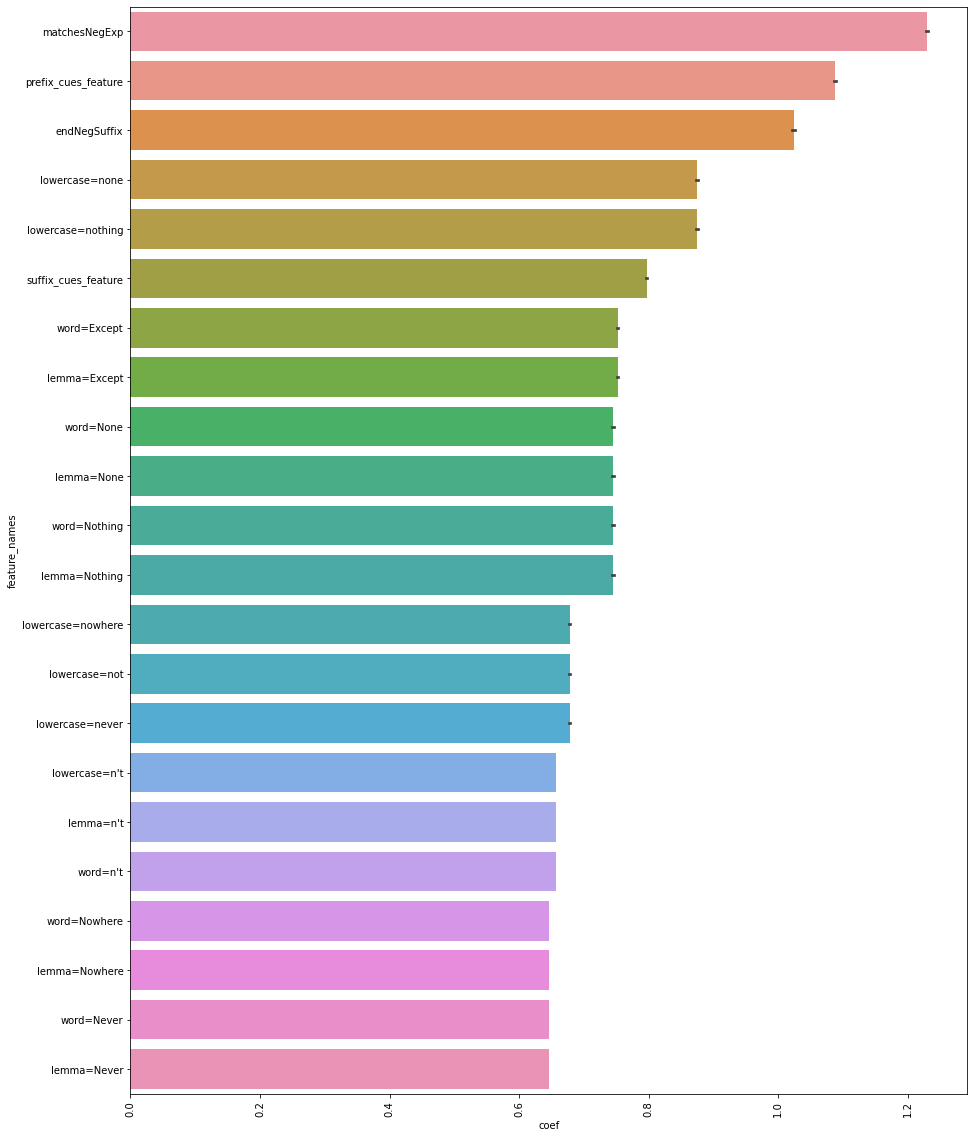

In [103]:
plt.figure(figsize=(15,20));
sns.barplot(y='feature_names', x='coef', data=coef_df[:40]);
plt.xticks(rotation=90);

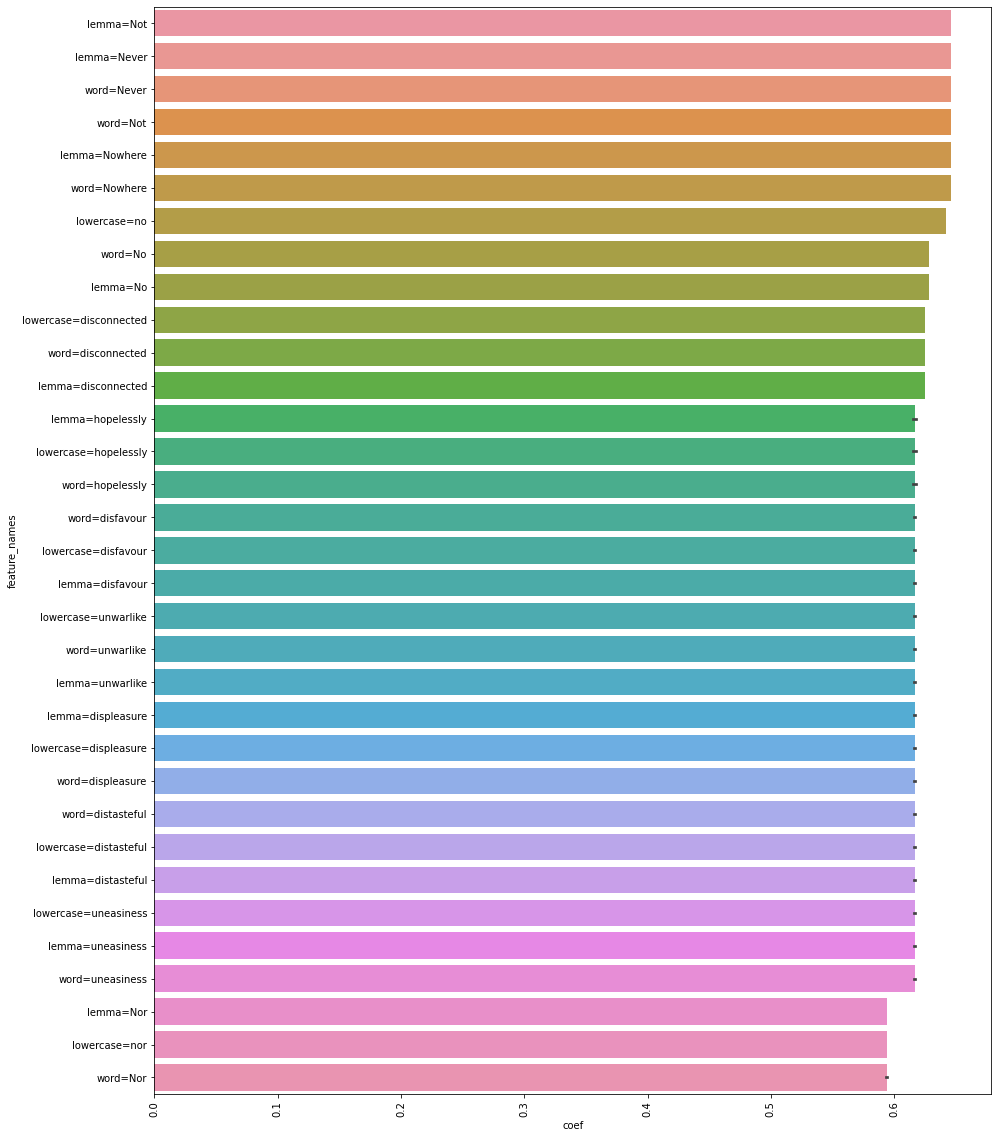

In [104]:
plt.figure(figsize=(15,20));
sns.barplot(y='feature_names', x='coef', data=coef_df[41:100]);
plt.xticks(rotation=90);